In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
df= pd.read_csv("vacmot_segmentation_variables.csv")

In [3]:
df.head()

,rest and relax,luxury / be spoilt,do sports,excitement,a challenge,not exceed planned budget,realise creativity,fun and entertainment,good company,health and beauty,...,entertainment facilities,not care about prices,life style of the local people,intense experience of nature,cosiness/familiar atmosphere,maintain unspoilt surroundings,everything organised,unspoilt nature/natural landscape,cultural offers,change of surroundings
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,1,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,NaN
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,NaN
3,1,1,0,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,NaN
4,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,NaN


In [4]:
df.isnull().sum()

rest and relax                          0
luxury / be spoilt                      0
do sports                               0
excitement                              0
 a challenge                            0
not exceed planned budget               0
realise creativity                      0
fun and entertainment                   0
good company                            0
health and beauty                       0
free-and-easy-going                     0
entertainment facilities                0
not care about prices                   0
life style of the local people          0
intense experience of nature            0
cosiness/familiar atmosphere            0
maintain unspoilt surroundings          0
everything organised                    0
unspoilt nature/natural landscape       0
cultural offers                         0
change of surroundings               1000
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rest and relax                     1000 non-null   int64  
 1   luxury / be spoilt                 1000 non-null   int64  
 2   do sports                          1000 non-null   int64  
 3   excitement                         1000 non-null   int64  
 4    a challenge                       1000 non-null   int64  
 5   not exceed planned budget          1000 non-null   int64  
 6   realise creativity                 1000 non-null   int64  
 7   fun and entertainment              1000 non-null   int64  
 8   good company                       1000 non-null   int64  
 9   health and beauty                  1000 non-null   int64  
 10  free-and-easy-going                1000 non-null   int64  
 11  entertainment facilities           1000 non-null   int64 

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

# Fill missing values with column means
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)


# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Fit KMeans (adjust n_clusters as needed)
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df_scaled)

# Get cluster assignments
clusters = kmeans.labels_



c:\Internship_project_2\envpr\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['change of surroundings']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [9]:
import pandas as pd
import numpy as np

# Add cluster assignments to your DataFrame
df['cluster'] = clusters

# Calculate percentage (mean) for each variable by segment
segment_profiles = df.groupby('cluster').mean().T * 100  # transpose so rows = variables

# Add total column (overall means)
segment_profiles['Total'] = df.drop(columns='cluster').mean() * 100

# Optional: rename columns to match the format in Table 8.1
segment_profiles.columns = [f'Seg. {i+1}' for i in range(len(segment_profiles.columns)-1)] + ['Total']

# Fill NaNs with 0 (or another value like -1 if you want to flag them)
segment_profiles = segment_profiles.fillna(0)

# Round and convert to integer
segment_profiles = segment_profiles.round(0).astype(int)

# Display or export
print(segment_profiles)

# Optional: save to CSV
# segment_profiles.to_csv("segment_profiles_table8_1_style.csv")


                                   Seg. 1  Seg. 2  Seg. 3  Seg. 4  Seg. 5  \
rest and relax                         97      94      74      98      97   
luxury / be spoilt                     40      41      12      19      47   
do sports                              22     100       0       1       0   
excitement                             67      60      48      32      27   
 a challenge                           75      58      43      77      59   
not exceed planned budget             100       0       1       0       0   
realise creativity                     71      83      61      45      83   
fun and entertainment                  81      56      53      53      49   
good company                           43      17       4      18      14   
health and beauty                      82      68      41      78      63   
free-and-easy-going                    29      35       8       9      52   
entertainment facilities               18      25      24      12      29   

In [10]:
segment_profiles

,Seg. 1,Seg. 2,Seg. 3,Seg. 4,Seg. 5,Seg. 6,Total
rest and relax,97,94,74,98,97,86,90
luxury / be spoilt,40,41,12,19,47,23,28
do sports,22,100,0,1,0,6,14
excitement,67,60,48,32,27,11,33
a challenge,75,58,43,77,59,26,51
not exceed planned budget,100,0,1,0,0,2,8
realise creativity,71,83,61,45,83,19,53
fun and entertainment,81,56,53,53,49,21,46
good company,43,17,4,18,14,4,12
health and beauty,82,68,41,78,63,21,52


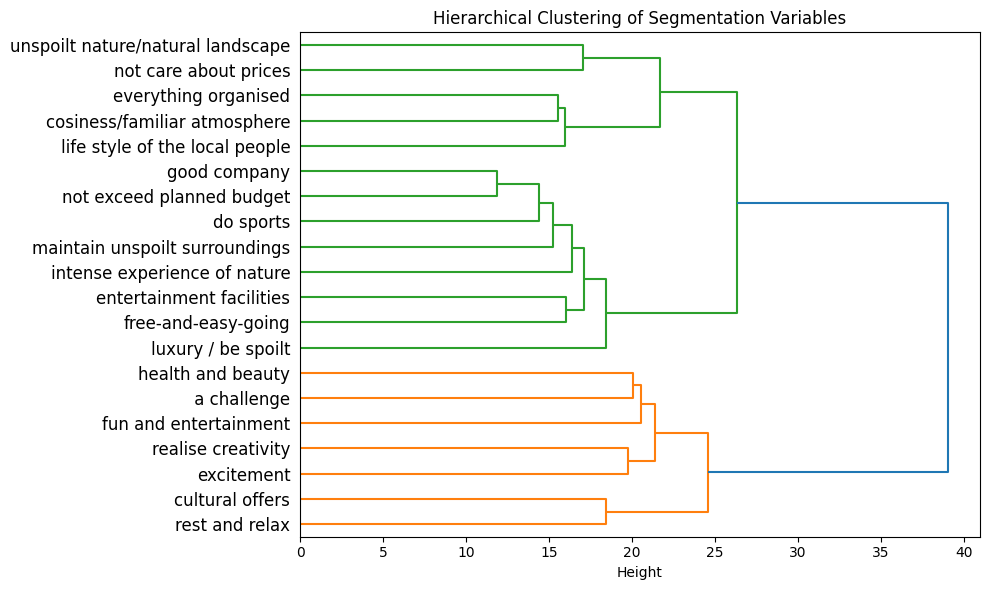

In [14]:
# Drop constant columns before clustering
df_clean = df.drop(columns='cluster').replace([np.inf, -np.inf], np.nan)
df_clean = df_clean.fillna(df_clean.mean())

# Drop columns (variables) with zero variance
df_clean = df_clean.loc[:, df_clean.std() > 0]

# Try again
dist_vars = pdist(df_clean.T, metric='euclidean')

# Final check
assert np.all(np.isfinite(dist_vars)), "Distance matrix still has NaN or Inf!"

# Clustering and plotting
linkage_vars = linkage(dist_vars, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_vars, labels=df_clean.columns, orientation='right')
plt.title("Hierarchical Clustering of Segmentation Variables")
plt.xlabel("Height")
plt.tight_layout()
plt.show()


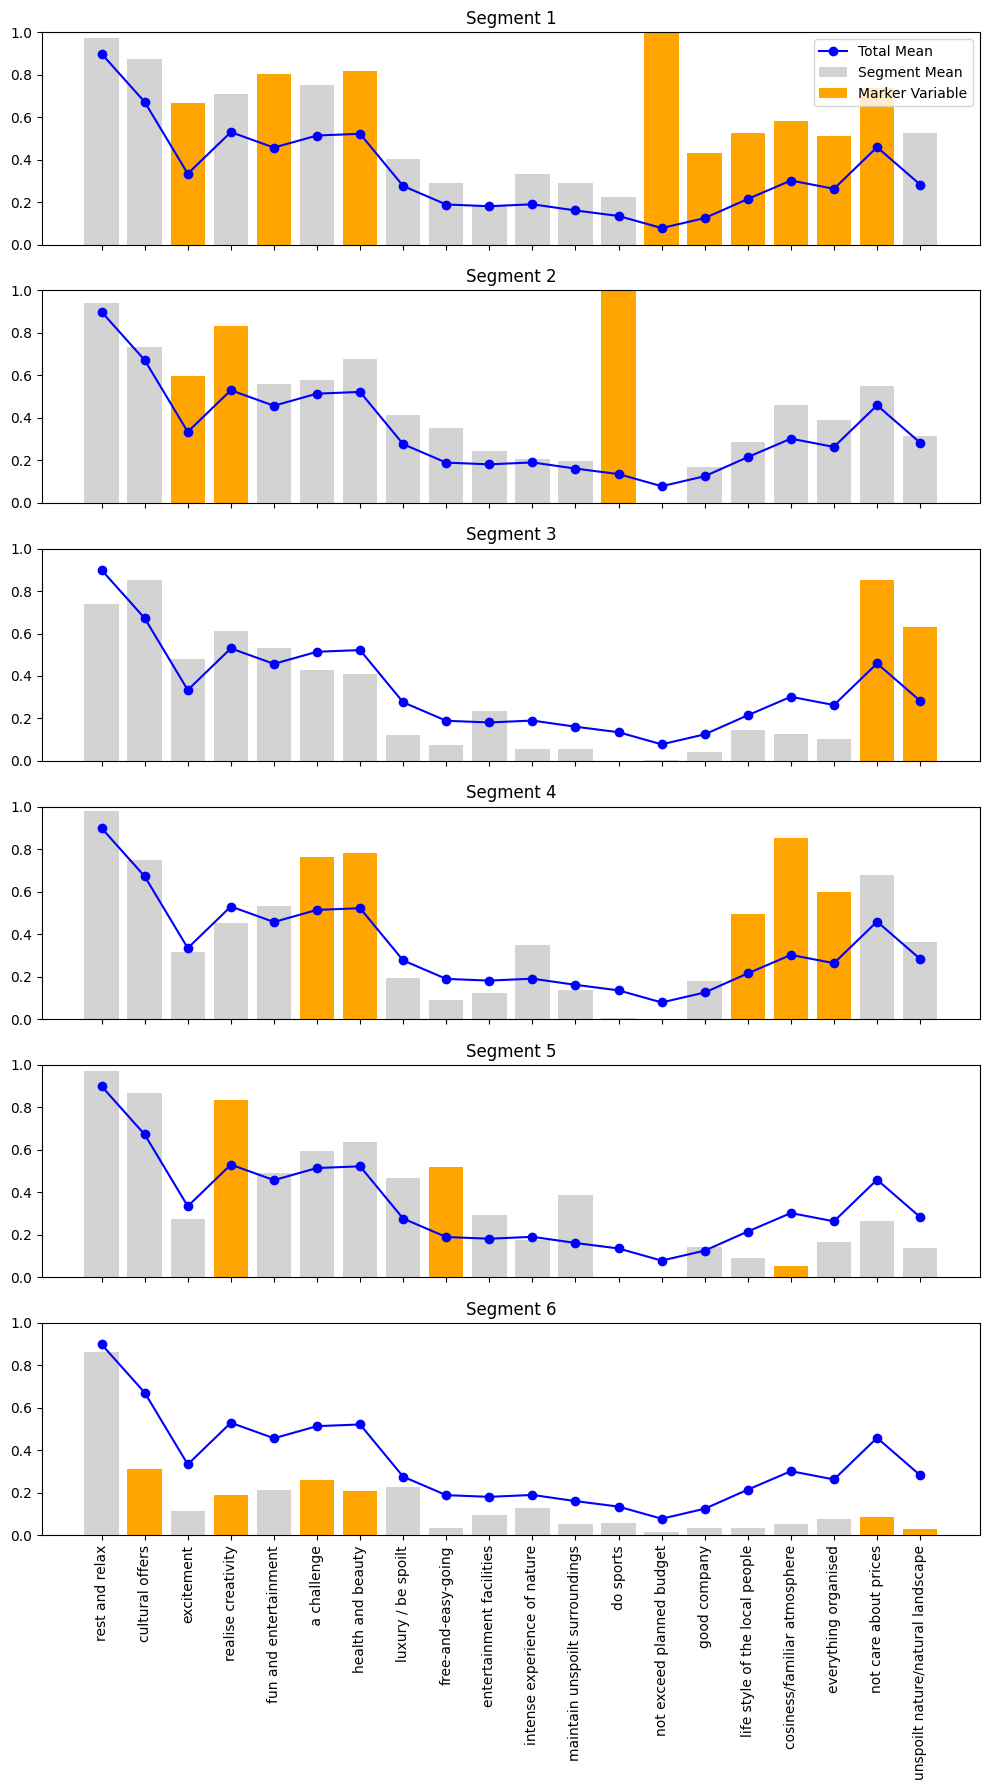

In [15]:
# Calculate segment means and total
segment_means = df.groupby('cluster').mean()
total_mean = df.drop(columns='cluster').mean()

# Reorder variables according to hierarchical clustering
import scipy.cluster.hierarchy as sch
ordered_vars = [df.drop(columns='cluster').columns[i] for i in sch.leaves_list(linkage_vars)]

# Plot segment profile plots (panel plot) like Figure 8.2
n_segments = segment_means.shape[0]
fig, axes = plt.subplots(n_segments, 1, figsize=(10, 3 * n_segments), sharex=True)

for i, ax in enumerate(axes):
    seg = segment_means.loc[i]
    deviations = (seg - total_mean).abs()
    marker_mask = deviations > 0.25  # marker variables
    
    # Grey bars for all variables
    ax.bar(ordered_vars, seg[ordered_vars], color='lightgray', label='Segment Mean')
    
    # Highlight marker variables
    ax.bar(
        [var for var in ordered_vars if marker_mask[var]],
        seg[[var for var in ordered_vars if marker_mask[var]]],
        color='orange', label='Marker Variable'
    )

    # Overlay dots for total means
    ax.plot(ordered_vars, total_mean[ordered_vars], 'o-', color='blue', label='Total Mean')
    
    ax.set_title(f"Segment {i+1}")
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=90)

axes[0].legend(loc='upper right')
plt.tight_layout()
plt.show()


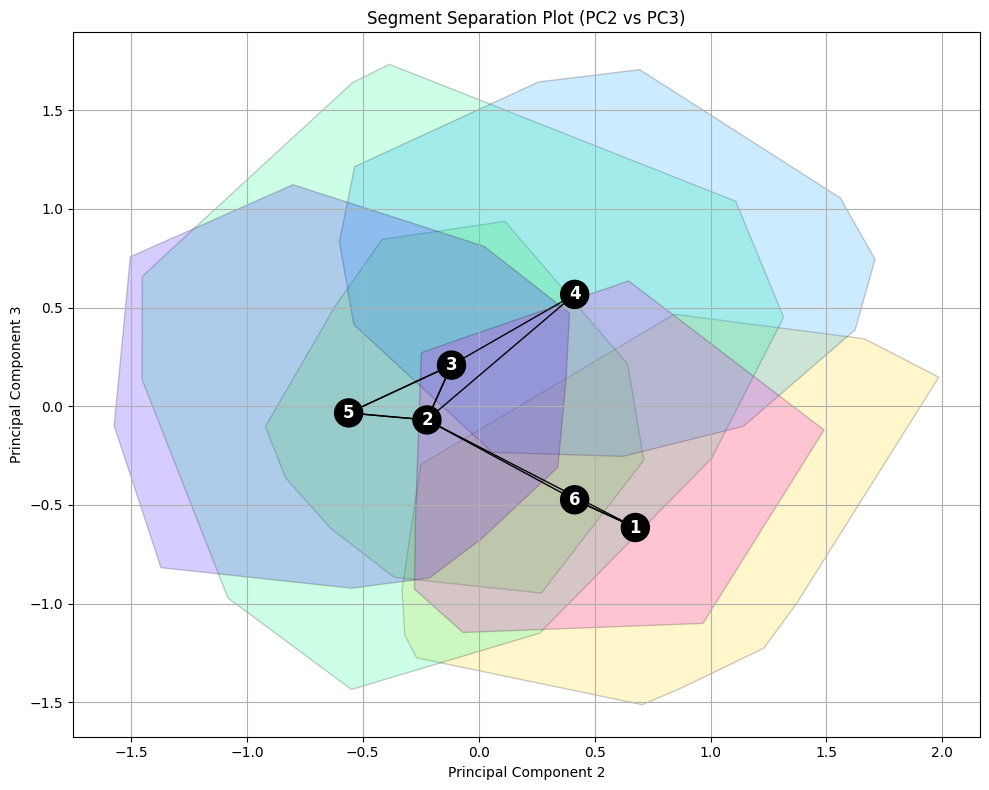

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Drop the column with all NaNs
df = df.drop(columns=["change of surroundings"])

# Run PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df)

# Perform clustering (assume 6 segments like in Fig. 8.5)
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(df)

# Project into PC2 and PC3 as in R example
pc2 = X_pca[:, 1]
pc3 = X_pca[:, 2]

# Create DataFrame for plotting
proj_df = pd.DataFrame({
    "PC2": pc2,
    "PC3": pc3,
    "Cluster": clusters
})

# Assign colors
palette = sns.color_palette("hsv", n_colors=6)
proj_df["Color"] = proj_df["Cluster"].map(lambda x: palette[x])

# Plot hulls and neighborhood graph
fig, ax = plt.subplots(figsize=(10, 8))

# Draw convex hulls per cluster
patches = []
for cluster in sorted(proj_df["Cluster"].unique()):
    points = proj_df[proj_df["Cluster"] == cluster][["PC2", "PC3"]].values
    if len(points) >= 3:
        hull = ConvexHull(points)
        polygon = Polygon(points[hull.vertices], closed=True)
        patches.append(polygon)
collection = PatchCollection(patches, facecolor=[palette[i] for i in range(6)], alpha=0.2, edgecolor="black")
ax.add_collection(collection)

# Draw centroids and neighborhood graph
centroids = np.array([
    [proj_df[proj_df["Cluster"] == i]["PC2"].mean(), proj_df[proj_df["Cluster"] == i]["PC3"].mean()]
    for i in range(6)
])
for i, (x, y) in enumerate(centroids):
    ax.text(x, y, str(i + 1), fontsize=12, weight='bold', ha='center', va='center', color='white', bbox=dict(facecolor='black', boxstyle='circle'))

# Draw black lines (neighborhood graph: each centroid connects to its 2 closest)
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3).fit(centroids)
_, indices = nbrs.kneighbors(centroids)
for i, neighbors in enumerate(indices):
    for j in neighbors[1:]:  # skip the point itself
        ax.plot([centroids[i, 0], centroids[j, 0]], [centroids[i, 1], centroids[j, 1]], 'k-', lw=1)

# Axes labels
ax.set_xlabel("Principal Component 2")
ax.set_ylabel("Principal Component 3")
ax.set_title("Segment Separation Plot (PC2 vs PC3)")
plt.grid(True)
plt.tight_layout()
plt.show()
